In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import seaborn as sns

sns.set()
from sklearn import preprocessing


### Loading the data and preprocessing for further analysis.

In [2]:
raw_data = pd.read_csv('weatherAUS.csv')
pd.set_option("display.max_columns", None)

raw_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
raw_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Removing the missing values.

In [4]:
raw_data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
raw_data.shape #before droping N/A values.

(145460, 23)

In [6]:
data_no_mv = raw_data.dropna(axis=0) #will drop all the missing values.
data_no_mv.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
data_no_mv = data_no_mv.drop(['Date'],axis=1)

### Replacing the yes or no to 1 and 0 in the raintoday and raintomorrow column.

In [8]:
data_no_mv['RainToday'] = data_no_mv['RainToday'].map({'Yes':1,'No':0})
data_no_mv['RainTomorrow'] = data_no_mv['RainTomorrow'].map({'Yes':1,'No':0})
data_no_mv

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [9]:
data_no_mv.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


### Creating dummy values to turn catagorical data to numerical.

In [10]:
data_with_dummies = pd.get_dummies(data_no_mv,drop_first=True)
data_with_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
data_with_dummies.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


### Since, from the describe table we can see that there are a bit outliers present in few data like Rainfall.
### The mean is 2.13 but the max is 206. Now that is a huge jump.

In [12]:
data_with_dummies.columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Sale', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustD

In [13]:
printlist = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'] #We are only intrested in these features because the rest are catagorical...
#That are changed to numerical.

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


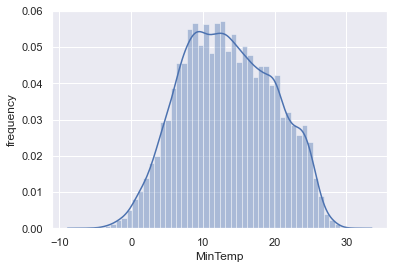

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


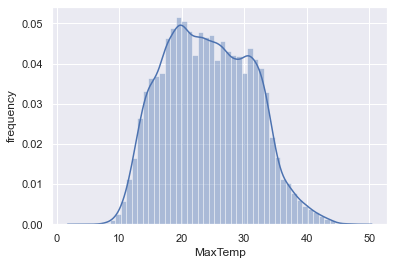

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


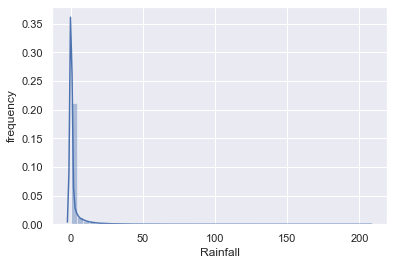

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


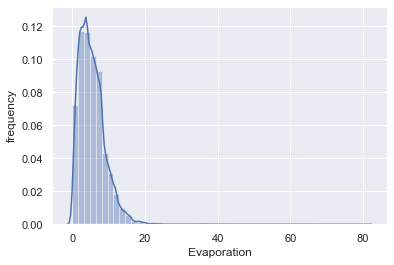

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


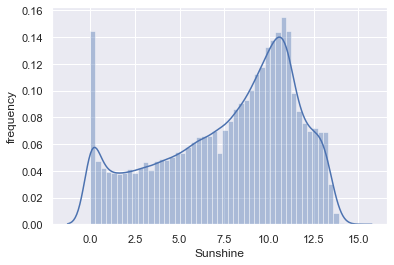

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


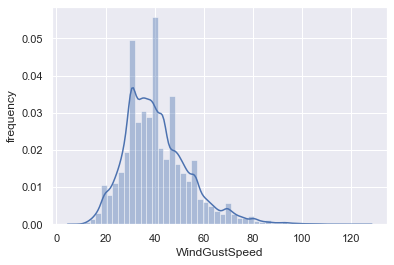

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


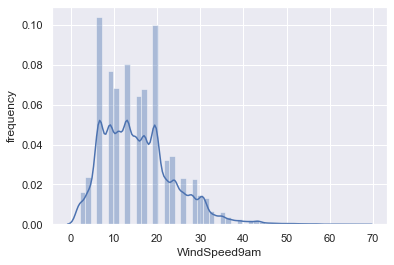

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


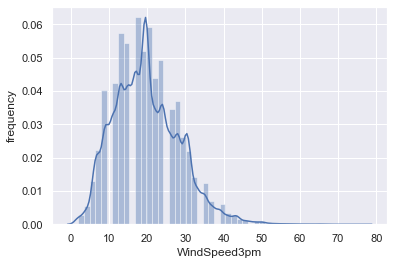

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


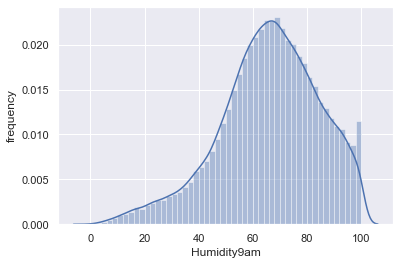

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


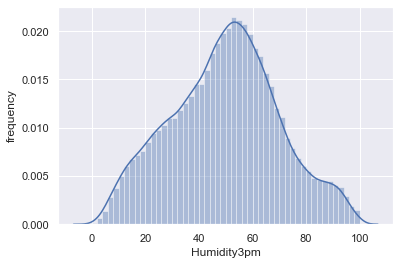

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


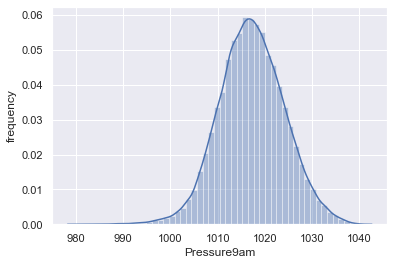

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


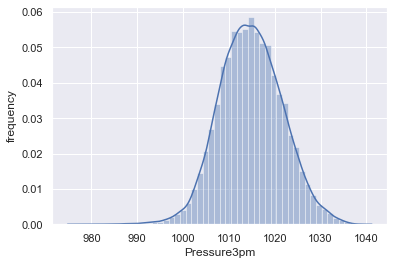

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


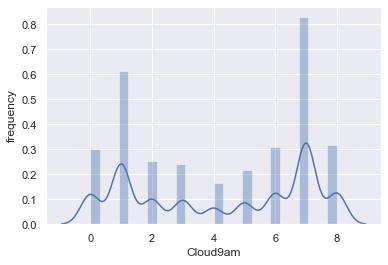

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


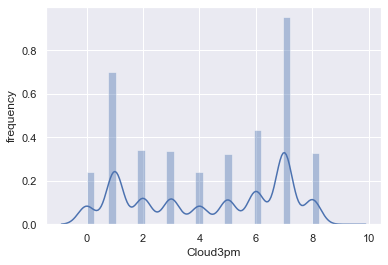

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


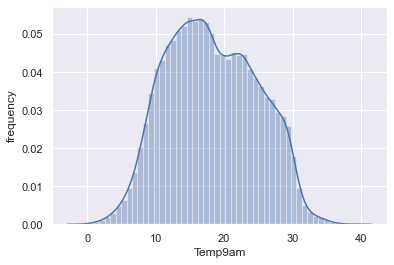

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\1966373760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies[feature])


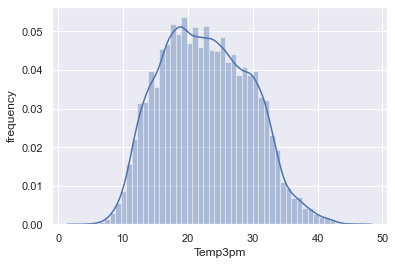

In [14]:
for feature in printlist:
    sns.distplot(data_with_dummies[feature])
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

### Looking at the frequency distribution plot, we there are clear outliers in 'Rainfall' and 'Evaporation'. So, we will crop the outliers and also a tiny bit in Windspeeds.

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\2074842654.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Rainfall'])


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

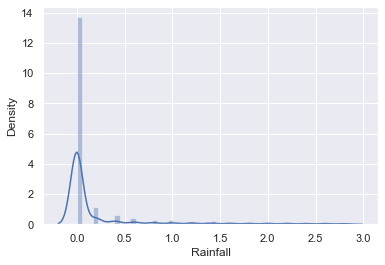

In [15]:
q1 = data_with_dummies['Rainfall'].quantile(0.85) #rejecting top 15 percentile.
data_1 = data_with_dummies[data_with_dummies['Rainfall']<q1]
sns.distplot(data_1['Rainfall'])

### We will drop this feature 'Rainfall' since it is very skewed.

In [16]:
data_with_dummies=data_with_dummies.drop(['Rainfall'],axis=1)

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\2739672574.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Evaporation'])


<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

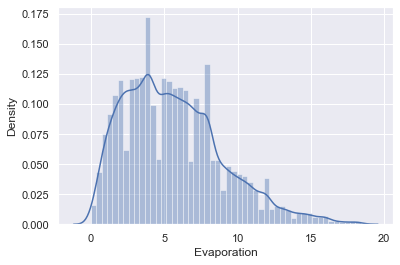

In [17]:
q2 = data_with_dummies['Evaporation'].quantile(0.995) #rejecting top 0.5% percentile.
data_2 = data_1[data_1['Evaporation']<q2]
sns.distplot(data_2['Evaporation'])

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\3269358286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['WindSpeed9am'])


<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

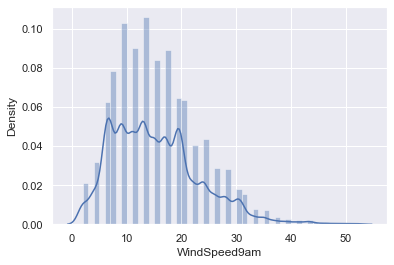

In [18]:
q3 = data_2['WindSpeed9am'].quantile(0.999) #rejecting top 0.1 percentile.
data_3 = data_2[data_2['WindSpeed9am']<q3]
sns.distplot(data_3['WindSpeed9am'])

C:\Users\kunal\AppData\Local\Temp\ipykernel_11480\885013639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['WindSpeed3pm'])


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

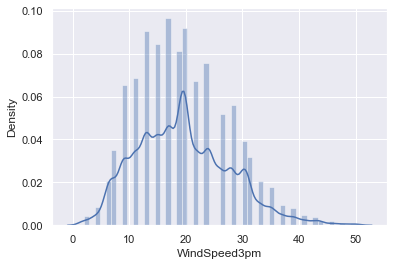

In [19]:
q4 = data_3['WindSpeed3pm'].quantile(0.999) #rejecting top 0.1 percentile.
data_cleaned = data_3[data_3['WindSpeed3pm']<q4]
sns.distplot(data_cleaned['WindSpeed3pm'])

### Dropping values after looking at the summary table of statesmodels.

In [21]:
#columns before removing.

data_cleaned.columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Sale', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustD

In [22]:
len(data_cleaned.columns.values)

88

In [23]:
indicies_to_remove = [24,36,39,45,46,67,75]

for i in indicies_to_remove:
    j=0
    data_cleaned = data_cleaned.drop([data_cleaned.columns.values[i-j]],axis=1)
    j+=1
    
data_cleaned.columns.values

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_Townsville', 'Location_WaggaWagga',
       'Location_Watsonia', 'Location_Woomera', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NW', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir

In [24]:
len(data_cleaned.columns.values)

81

### Scaling the data.
#### But before that we have to seperate the outputs and inputs.

In [25]:
inputs = data_cleaned.drop(['RainTomorrow'],axis=1)
outputs = data_cleaned['RainTomorrow']
outputs.unique()

array([0, 1], dtype=int64)

In [26]:
outputs.describe()

count    47497.000000
mean         0.168937
std          0.374700
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: RainTomorrow, dtype: float64

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [28]:
inputs = scaler.transform(inputs)
inputs

array([[ 0.72483668,  1.5308312 , -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [ 0.80253107,  0.61819659, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [ 0.95791986,  1.87850153, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       ...,
       [ 1.15992529,  1.18316087, -0.40386369, ...,  3.80015228,
        -0.23734775, -0.26186441],
       [ 0.97345874,  1.03829823, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [ 1.0822309 ,  1.02381197, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441]])

## Splitting the inputs and outputs to train and test datasets.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(inputs,outputs,test_size=0.2)
x_train

array([[ 0.4140591 ,  0.50230648, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [ 0.53837013,  2.11028175, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [ 1.54839727,  0.79203175, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       ...,
       [ 0.18097591,  0.12566362, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [-2.88018328, -1.67063308, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441],
       [-2.18093372, -1.56922924, -0.40386369, ..., -0.26314735,
        -0.23734775, -0.26186441]])

### Building and training Model for Logit function using statsmodels.

In [30]:
x_new = sm.add_constant(x_train)

In [31]:
sm_log_reg=sm.Logit(y_train,x_new).fit()

Optimization terminated successfully.
         Current function value: 0.298061
         Iterations 7


In [33]:
sm_log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                37997
Model:                          Logit   Df Residuals:                    37916
Method:                           MLE   Df Model:                           80
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.3431
Time:                        10:58:24   Log-Likelihood:                -11325.
converged:                       True   LL-Null:                       -17240.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3884      0.024   -100.531      0.000      -2.435      -2.342
x1            -0.1566      0.066     -2.389      0.017      -0.285      -0.028
x2            -0.0064      0.107     -0.060      0.952      -0.217       0.204
x3             0.1725      0.034      5.143      0.000       0.107       0.238
x4            -0.0030      0.031     -0.094      0.925      -0.064       0.058
x5            -0.5291      0.029    -18.212      0.000      -0.586      -0.472
x6             0.6647      0.027     24.539      0.000       0.612       0.718
x7            -0.0438      0.024     -1.841      0.066      -0.090       0.003
x8            -0.1315      0.025     -5.284      0.000      -0.180      -0.083
x9            -0.0021      0.038     -0.054      0.957      -0.077       0.073
x10            1.1514      0.044     26.276      0.000       1.066       1.237
x11            1.0896      0.085     12.823      0.000       0.923       1.256
x12           -1.5329      0.085    -17.982      0.000      -1.700      -1.366
x13           -0.0777      0.027     -2.895      0.004      -0.130      -0.025
x14            0.3592      0.028     12.799      0.000       0.304       0.414
x15            0.2572      0.097      2.640      0.008       0.066       0.448
x16            0.0811      0.117      0.693      0.488      -0.148       0.310
x17           -0.0470      0.032     -1.463      0.144      -0.110       0.016
x18            0.1526      0.022      7.027      0.000       0.110       0.195
x19            0.0112      0.022      0.515      0.607      -0.031       0.054
x20            0.0528      0.019      2.759      0.006       0.015       0.090
x21            0.0105      0.025      0.428      0.668      -0.038       0.059
x22            0.0405      0.017      2.391      0.017       0.007       0.074
x23           -0.0760      0.025     -3.060      0.002      -0.125      -0.027
x24            0.0339      0.018      1.836      0.066      -0.002       0.070
x25           -0.0261      0.021     -1.238      0.216      -0.067       0.015
x26            0.0623      0.025      2.542      0.011       0.014       0.110
x27            0.0530      0.023      2.268      0.023       0.007       0.099
x28            0.0505      0.019      2.626      0.009       0.013       0.088
x29            0.0201      0.019      1.058      0.290      -0.017       0.057
x30            0.0472      0.021      2.214      0.027       0.005       0.089
x31            0.1618      0.023      7.139      0.000       0.117       0.206
x32            0.0920      0.023      4.052      0.000       0.047       0.136
x33            0.0546      0.017      3.257      0.001       0.022       0.088
x34           -0.0401      0.019     -2.096      0.036      -0.078      -0.003
x35            0.0308      0.018      1.702      0.089      -0.005       0.066
x36           -0.1062      0.024     -4.498      0.000      -0.153      -0.060
x37            0.0893      0.023      3.887      0.000       0.044       0.134
x3

### by looking at the p-values here, I have dropped 7 different variables which had unacceptable p-values. Obviously I have ran the code from the start again with the changes so you will not find those variables in this table but above you will find me removing them.

### Building and training Model for Logistic Regression using Sklearn.

In [38]:
skl_log_reg = LogisticRegression()
skl_log_reg.fit(x_train,y_train)


LogisticRegression()

### testing the model.

In [40]:
y_prediction = skl_log_reg.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_test

41071     0
39641     0
76230     0
73152     0
139314    1
         ..
67381     1
70764     0
22250     0
36385     0
65336     1
Name: RainTomorrow, Length: 9500, dtype: int64

In [43]:
confusion_matrix(y_test,y_prediction)

array([[7569,  315],
       [ 907,  709]], dtype=int64)

<AxesSubplot:>

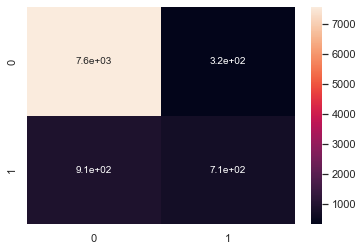

In [42]:
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

In [46]:
print("Test accuracy :" +str(((7569+709)/(907+315+7569+709))*100.00) +'%')

Test accuracy :87.13684210526316%
